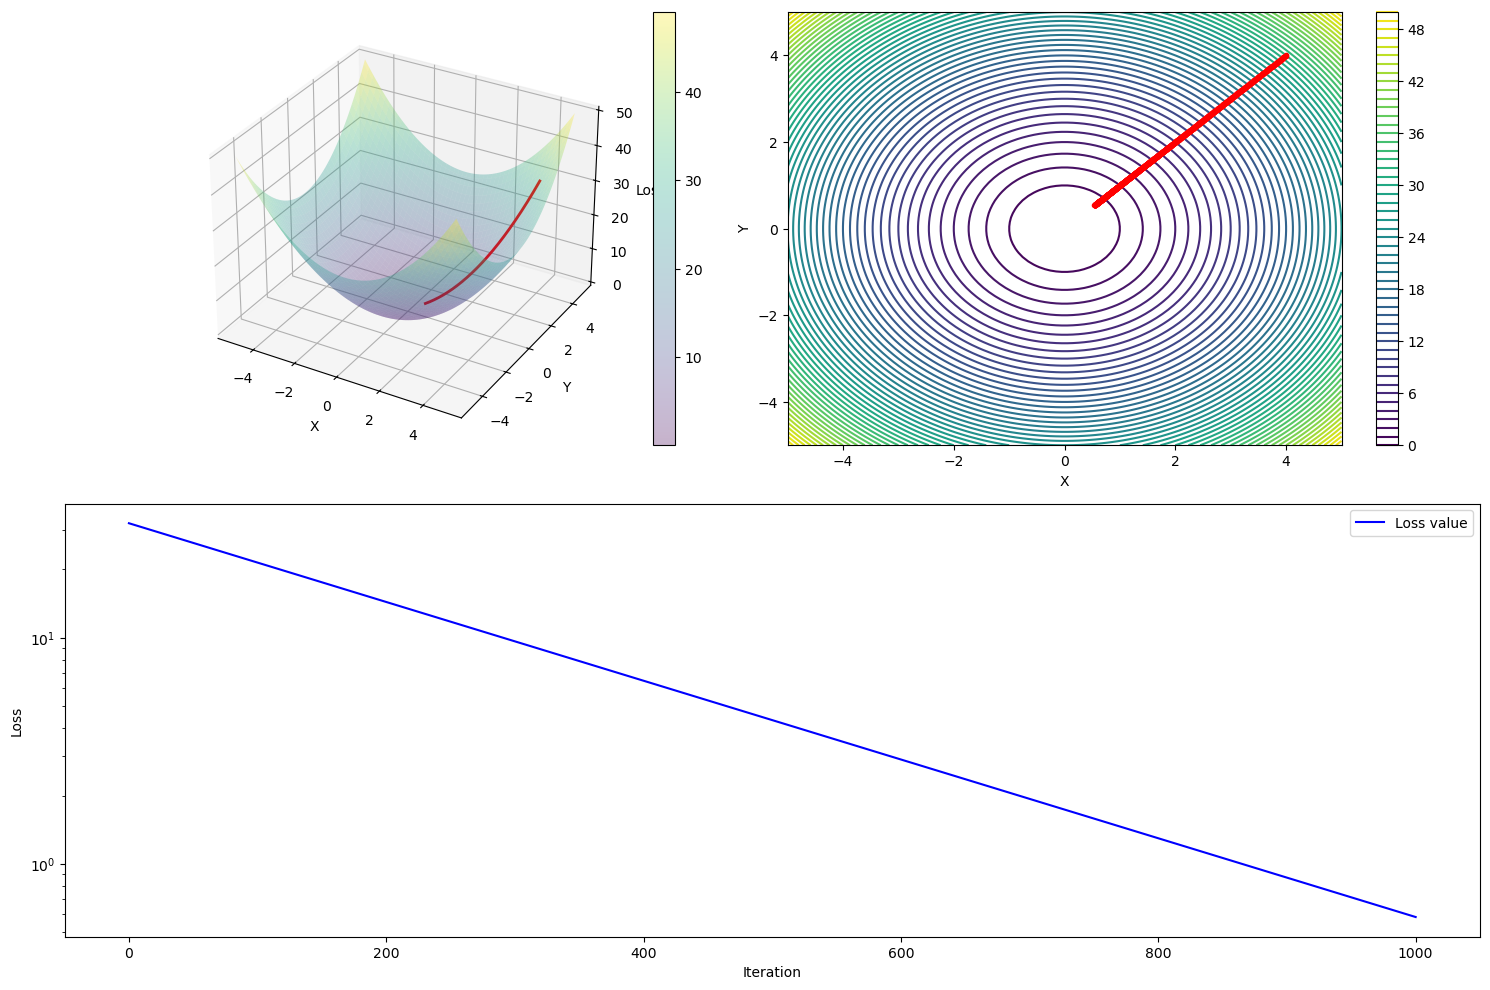

Минимум найден в точке: [0.54025809 0.54025809]
Значение функции: 0.5837576071523692


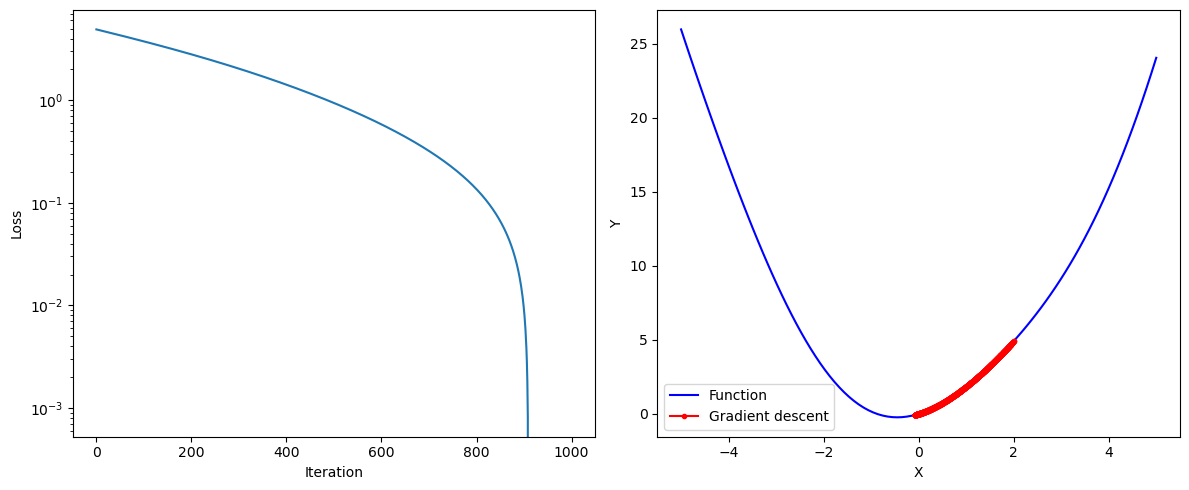

Минимум найден в точке: [-0.08333072]
Значение функции: -0.07629030241642619


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from findiff import FinDiff
from inspect import signature

class LossFunction:
    def __init__(self, func):
        self.func = func
        self.num_params = len(signature(func).parameters)

    def __call__(self, *args):
        return self.func(*args)

    def gradient(self, *args, h=1e-5):
        if self.num_params == 1:
            x = np.array([args[0]])
            x_array = np.linspace(x[0] - h, x[0] + h, 3)
            f_values = np.array([self.func(xi) for xi in x_array])
            d_dx = FinDiff(0, h)
            return np.array([d_dx(f_values)[1]])  
        else:
            grad = np.zeros(len(args))
            for i in range(len(args)):
                args_plus = list(args)
                args_minus = list(args)
                args_plus[i] += h
                args_minus[i] -= h
                grad[i] = (self.func(*args_plus) - self.func(*args_minus)) / (2 * h)
            return grad

# Примеры функций ошибки
@LossFunction
def quadratic_loss(x, y):
    return x ** 2 + y ** 2

@LossFunction
def single_param_loss(x):
    return x ** 2 + np.sin(x)

def gradient_descent(loss_func, start_point, learning_rate=0.001, num_iterations=1000):
    point = np.array(start_point)
    history = [(point, loss_func(*point))]

    for _ in range(num_iterations):
        gradient = loss_func.gradient(*point)
        point = point - learning_rate * gradient
        history.append((point, loss_func(*point)))

    return point, history

def plot_results(loss_func, history):
    if len(history[0][0]) != 2:
        # График для одномерной функции
        plt.figure(figsize=(12, 5))

        # График сходимости
        plt.subplot(121)
        losses = [h[1] for h in history]
        plt.plot(losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.yscale('log')

        # График предсказаний
        plt.subplot(122)
        x = np.linspace(-5, 5, 100)
        y = np.array([loss_func(xi) for xi in x])
        points = np.array([h[0][0] for h in history])
        values = np.array([h[1] for h in history])

        plt.plot(x, y, 'b-', label='Function')
        plt.plot(points, values, 'r.-', label='Gradient descent')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

        plt.tight_layout()
        plt.show()
        return

    # Визуализация для двумерной функции
    points = np.array([h[0] for h in history])
    losses = np.array([h[1] for h in history])

    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[loss_func(xi, yi) for xi, yi in zip(xrow, yrow)]
                  for xrow, yrow in zip(X, Y)])

    fig = plt.figure(figsize=(15, 10))

    # 3D поверхность с траекторией
    ax1 = fig.add_subplot(221, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')
    ax1.plot(points[:, 0], points[:, 1], losses, 'r-', linewidth=2, label='Gradient descent')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Loss')
    fig.colorbar(surf, ax=ax1)

    # Контурный график с траекторией
    ax2 = fig.add_subplot(222)
    contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.plot(points[:, 0], points[:, 1], 'r.-', label='Gradient descent')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    plt.colorbar(contour, ax=ax2)

    # График сходимости
    ax3 = fig.add_subplot(212)
    ax3.plot(losses, 'b-', label='Loss value')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Loss')
    ax3.set_yscale('log')
    ax3.legend()

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Для функции с двумя параметрами
    start_point = [4.0, 4.0]
    min_point, history = gradient_descent(quadratic_loss, start_point)
    plot_results(quadratic_loss, history)
    print(f"Минимум найден в точке: {min_point}")
    print(f"Значение функции: {quadratic_loss(*min_point)}")

    # Для функции с одним параметром
    start_point = [2.0]
    min_point, history = gradient_descent(single_param_loss, start_point)
    plot_results(single_param_loss, history)
    print(f"Минимум найден в точке: {min_point}")
    print(f"Значение функции: {single_param_loss(*min_point)}")